<a href="https://colab.research.google.com/github/amaresh12321/Think41/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# Modeling & evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve, roc_curve,
    classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Optional analysis
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    import statsmodels.api as sm
    _HAS_STATSMODELS = True
except Exception:
    _HAS_STATSMODELS = Fals

In [5]:
DATA_PATH = "/content/sample_data/Fraud.csv"
assert os.path.exists(DATA_PATH), f"File not found: {DATA_PATH}"

In [6]:
df = pd.read_csv(DATA_PATH)
df.shape, df.head(3)

((260509, 11),
    step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
 0     1   PAYMENT  9839.64  C1231006815       170136.0       160296.36   
 1     1   PAYMENT  1864.28  C1666544295        21249.0        19384.72   
 2     1  TRANSFER   181.00  C1305486145          181.0            0.00   
 
       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
 0  M1979787155             0.0             0.0      0.0             0.0  
 1  M2044282225             0.0             0.0      0.0             0.0  
 2   C553264065             0.0             0.0      1.0             0.0  )

In [7]:
# 1) Missing values & duplicates
print("Null counts:\n", df.isnull().sum())
dups = df.duplicated().sum()
print("\nDuplicate rows:", dups)

Null counts:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

Duplicate rows: 0


In [8]:
# 1. Fill balances with 0 (if missing, assume no balance)
df["oldbalanceOrg"].fillna(0, inplace=True)
df["newbalanceOrig"].fillna(0, inplace=True)
df["oldbalanceDest"].fillna(0, inplace=True)
df["newbalanceDest"].fillna(0, inplace=True)

# 2. Fill missing destination name with "Unknown"
df["nameDest"].fillna("Unknown", inplace=True)

# 3. Fill missing fraud flags with 0 (not fraudulent)
df["isFraud"].fillna(0, inplace=True)
df["isFlaggedFraud"].fillna(0, inplace=True)

# --- Verify again ---
print("Missing values after filling:")
print(df.isnull().sum())

print(f"\n✅ Final dataset shape: {df.shape}")

Missing values after filling:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

✅ Final dataset shape: (260509, 11)


/tmp/ipython-input-3414465268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldbalanceOrg"].fillna(0, inplace=True)
/tmp/ipython-input-3414465268.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [9]:
# 2) Sort by time step to avoid leakage and to build causal features
df = df.sort_values('step').reset_index(drop=True)

# 3) Feature engineering (balance math, amount transforms, structural flags)
amt_p99 = df['amount'].quantile(0.99)
df['amount_cap'] = df['amount'].clip(upper=amt_p99)
df['log_amount'] = np.log1p(df['amount'])

df['deltaOrig'] = (df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']).round(2)
df['deltaDest'] = (df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']).round(2)
df['abs_deltaOrig'] = df['deltaOrig'].abs()
df['abs_deltaDest'] = df['deltaDest'].abs()

df['isMerchantDest'] = df['nameDest'].str.startswith('M').astype(int)
df['isZeroOrigMove'] = ((df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']>0)).astype(int)
df['isZeroDestNoChange'] = ((df['oldbalanceDest']==0) & (df['newbalanceDest']==0) & (df['amount']>0)).astype(int)
df['sameBalanceAfter'] = ((df['oldbalanceOrg']==df['newbalanceOrig']) | (df['oldbalanceDest']==df['newbalanceDest'])).astype(int)
df['hour_of_day'] = (df['step'] % 24).astype(int)
df['day_of_week'] = (df['step'] // 24 % 7).astype(int)

In [10]:
# Light velocity (causal; up to current record per origin)
df['txn_count_by_origin'] = df.groupby('nameOrig').cumcount()
df['cum_amount_by_origin'] = df.groupby('nameOrig')['amount'].cumsum() - df['amount']

def add_rolling_features(group: pd.DataFrame) -> pd.DataFrame:
    # Past 24h sums/counts (shifted to exclude current row)
    amt_roll = group['amount'].rolling(window=24, min_periods=1).sum().shift(1).fillna(0.0)
    cnt_roll = group['amount'].rolling(window=24, min_periods=1).count().shift(1).fillna(0.0)
    group['amt_last24h_by_origin'] = amt_roll.values
    group['cnt_last24h_by_origin'] = cnt_roll.values
    # Hours since last txn
    last_step = group['step'].shift(1)
    group['hrs_since_last_by_origin'] = (group['step'] - last_step).fillna(1.0)
    return group

df = df.groupby('nameOrig', group_keys=False).apply(add_rolling_features)

/tmp/ipython-input-4030816320.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('nameOrig', group_keys=False).apply(add_rolling_features)


In [12]:
# 4) Correlation & VIF (for numeric set)
num_cols = [
    'amount','amount_cap','log_amount',
    'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',
    'deltaOrig','deltaDest','abs_deltaOrig','abs_deltaDest',
    'isFlaggedFraud','isMerchantDest','isZeroOrigMove','isZeroDestNoChange',
    'sameBalanceAfter','hour_of_day','day_of_week',
    'txn_count_by_origin','cum_amount_by_origin',
    'amt_last24h_by_origin','cnt_last24h_by_origin','hrs_since_last_by_origin'
]

corr = df[num_cols].corr()
print("\nCorrelation snapshot (top 10 by absolute mean):")
abs_mean = corr.abs().mean().sort_values(ascending=False).head(10)
print(abs_mean)



Correlation snapshot (top 10 by absolute mean):
log_amount            0.325901
deltaOrig             0.316181
abs_deltaOrig         0.316181
amount_cap            0.312708
isZeroDestNoChange    0.310160
isMerchantDest        0.310129
amount                0.302579
sameBalanceAfter      0.268796
newbalanceDest        0.258753
oldbalanceDest        0.212875
dtype: float64


In [13]:
# VIF (if statsmodels available). Drop constant/near-constant to avoid singularities.
vif_table = None
if _HAS_STATSMODELS:
    X_vif = df[num_cols].select_dtypes(include=[np.number]).copy()
    X_vif = X_vif.fillna(0.0)
    X_vif = X_vif.loc[:, X_vif.var() > 1e-6]
    X_vif = sm.add_constant(X_vif, has_constant='add')
    vif_vals = []
    for i in range(1, X_vif.shape[1]):  # skip constant
        vif_vals.append({
            "feature": X_vif.columns[i],
            "VIF": variance_inflation_factor(X_vif.values, i)
        })
    vif_table = pd.DataFrame(vif_vals).sort_values("VIF", ascending=False)
    display(vif_table.head(10))
else:
    print("\nstatsmodels not available — skipping VIF. Correlation will guide collinearity decisions.")

df.shape

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,amount,inf
4,newbalanceOrig,inf
3,oldbalanceOrg,inf
6,newbalanceDest,inf
5,oldbalanceDest,inf
17,cum_amount_by_origin,inf
18,amt_last24h_by_origin,inf
7,deltaOrig,inf
8,deltaDest,inf
19,cnt_last24h_by_origin,inf


(260509, 28)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['VIF']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'VIF'}, axis=1)
              .sort_values('VIF', ascending=True))
  xs = counted['VIF']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('VIF', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('VIF')
_ = plt.ylabel('count()')

In [14]:
# Prepare features/target
cat_cols = ['type']
X = df[num_cols + cat_cols].copy()
y = df['isFraud'].astype(int).values

# Train/validation split (stratified to ensure both classes appear in validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Preprocessing: One-hot encode 'type', pass-through others
pre = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore'), cat_cols)], remainder='passthrough')

# Model
rf = RandomForestClassifier(
    n_estimators=500,
    class_weight={0:1, 1:20},
    n_jobs=-1,
    random_state=42
)

pipe = Pipeline([('pre', pre), ('clf', rf)])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf',
                 RandomForestClassifier(class_weight={0: 1, 1: 20},
                                        n_estimators=500, n_jobs=-1,
                                        random_state=42))])

In [15]:
# Keep transformed feature names for later reporting
ohe_features = pipe.named_steps['pre'].named_transformers_['ohe'].get_feature_names_out(cat_cols).tolist()
base_features = [c for c in X.columns if c not in cat_cols]
feature_names = ohe_features + base_features

len(feature_names), feature_names[:10]

(28,
 ['type_CASH_IN',
  'type_CASH_OUT',
  'type_DEBIT',
  'type_PAYMENT',
  'type_TRANSFER',
  'amount',
  'amount_cap',
  'log_amount',
  'oldbalanceOrg',
  'newbalanceOrig'])

In [16]:
# Feature importances
rf_model = pipe.named_steps['clf']
importances = rf_model.feature_importances_
fi = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
fi.head(15)


,feature,importance
9,newbalanceOrig,0.269735
14,abs_deltaOrig,0.106985
12,deltaOrig,0.094176
7,log_amount,0.057870
5,amount,0.052925
4,type_TRANSFER,0.051635
21,hour_of_day,0.050455
6,amount_cap,0.044058
8,oldbalanceOrg,0.043534
13,deltaDest,0.036033


In [17]:
# Optional pruning example: keep top features until 95% cumulative importance
fi = fi.reset_index(drop=True)
fi['cum_importance'] = fi['importance'].cumsum()
keep = fi.loc[fi['cum_importance'] <= 0.95, 'feature'].tolist()
len(keep), keep[:10]

(15,
 ['newbalanceOrig',
  'abs_deltaOrig',
  'deltaOrig',
  'log_amount',
  'amount',
  'type_TRANSFER',
  'hour_of_day',
  'amount_cap',
  'oldbalanceOrg',
  'deltaDest'])

In [18]:

# Predict probabilities
p_valid = pipe.predict_proba(X_valid)[:,1]

# Metrics
roc = roc_auc_score(y_valid, p_valid)
pr_auc = average_precision_score(y_valid, p_valid)
prec, rec, thr = precision_recall_curve(y_valid, p_valid)

# Choose threshold: highest recall while precision >= 0.90, else best F1
chosen_threshold = 0.5
idx = np.where(prec[:-1] >= 0.90)[0]
if len(idx):
    best_idx = idx[np.argmax(rec[idx])]
    chosen_threshold = thr[best_idx]
else:
    f1_scores = (2 * prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)
    best_idx = np.argmax(f1_scores)
    chosen_threshold = thr[best_idx]

y_pred = (p_valid >= chosen_threshold).astype(int)
cm = confusion_matrix(y_valid, y_pred, labels=[0,1])
report = classification_report(y_valid, y_pred)
roc, pr_auc, chosen_threshold, cm, print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65086
           1       0.90      0.90      0.90        42

    accuracy                           1.00     65128
   macro avg       0.95      0.95      0.95     65128
weighted avg       1.00      1.00      1.00     65128



(np.float64(0.951738578847327),
 np.float64(0.9048233222781806),
 np.float64(0.244),
 array([[65082,     4],
        [    4,    38]]),
 None)

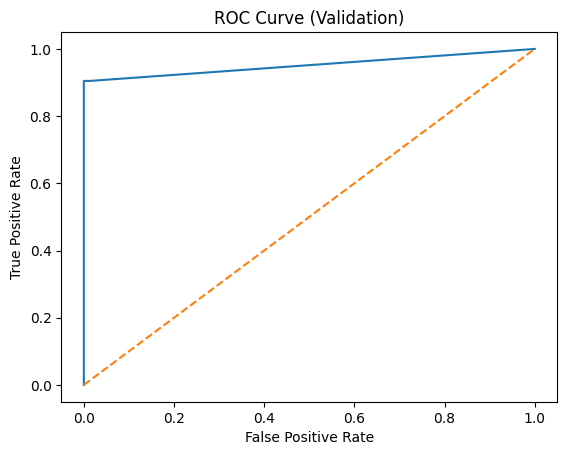

In [19]:

# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_valid, p_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Validation)")
plt.show()


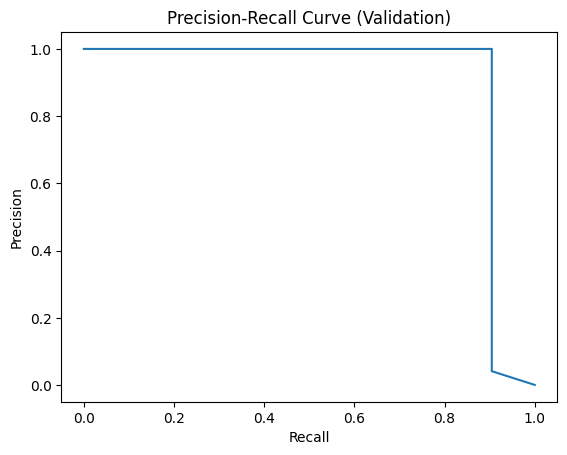

In [20]:

# Precision-Recall curve
plt.figure()
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Validation)")
plt.show()


In [21]:

top_fi = fi.head(10).copy()
top_fi


,feature,importance,cum_importance
0,newbalanceOrig,0.269735,0.269735
1,abs_deltaOrig,0.106985,0.376720
2,deltaOrig,0.094176,0.470896
3,log_amount,0.057870,0.528766
4,amount,0.052925,0.581691
5,type_TRANSFER,0.051635,0.633326
6,hour_of_day,0.050455,0.683781
7,amount_cap,0.044058,0.727839
8,oldbalanceOrg,0.043534,0.771374
9,deltaDest,0.036033,0.807407


Transformed features: ['cat__type_CASH_IN' 'cat__type_CASH_OUT' 'cat__type_DEBIT'
 'cat__type_PAYMENT' 'cat__type_TRANSFER' 'num__amount'
 'num__oldbalanceOrg' 'num__newbalanceOrig' 'num__oldbalanceDest'
 'num__newbalanceDest']
Numeric features for PDP: ['num__amount', 'num__oldbalanceOrg', 'num__newbalanceOrig']


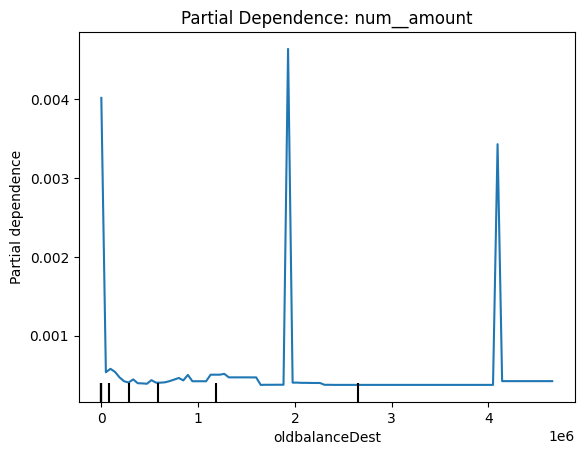

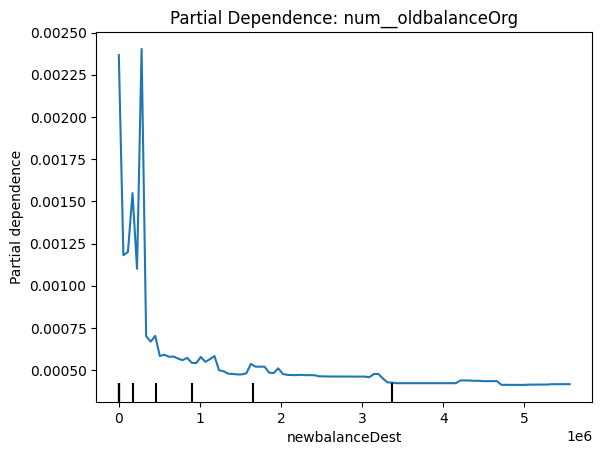

/usr/local/lib/python3.12/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


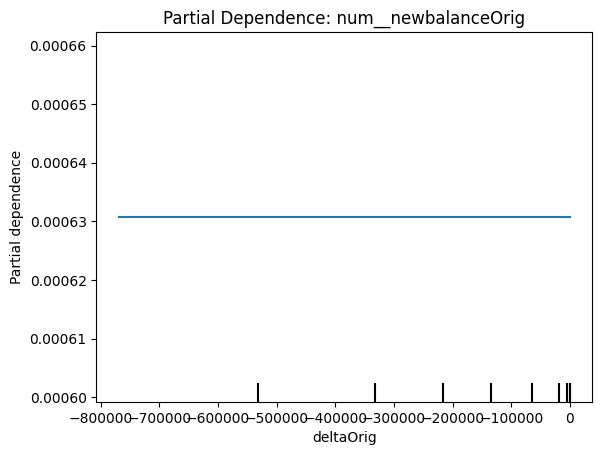

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Define preprocessing
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical),
        ("num", StandardScaler(), numeric)
    ]
)

# Build pipeline
pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(random_state=42))
])

# Ensure pandas output
set_config(transform_output="pandas")

# Fit
pipe.fit(X_train, y_train)

# Get transformed feature names
feature_names_out = pipe[:-1].get_feature_names_out()
print("Transformed features:", feature_names_out[:20])

# # Select numeric candidates
# numeric_candidates = [
#     f for f in feature_names_out
#     if f.endswith(("amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"))
# ][:3]

print("Numeric features for PDP:", numeric_candidates)

feature_idx_map = {name: i for i, name in enumerate(feature_names_out)}
numeric_candidates = [
    f for f in feature_names_out
    if f.endswith(("amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"))
][:3]

# Plot Partial Dependence
for feat in numeric_candidates:
    idx = feature_idx_map[feat]
    disp = PartialDependenceDisplay.from_estimator(
        pipe, X_valid, [idx]  # pass index instead of name
    )
    plt.title(f"Partial Dependence: {feat}")
    plt.show()


In [27]:

# Example KPI functions for evaluation (requires predicted probabilities and labels)
def kpi_summary(y_true, p_hat, threshold=None, target_precision=None):
    from sklearn.metrics import precision_recall_curve, confusion_matrix, average_precision_score, roc_auc_score
    ap = average_precision_score(y_true, p_hat)
    roc = roc_auc_score(y_true, p_hat)
    prec, rec, thr = precision_recall_curve(y_true, p_hat)

    if target_precision is not None:
        idx = np.where(prec[:-1] >= target_precision)[0]
        if len(idx):
            best_idx = idx[np.argmax(rec[idx])]
            threshold = thr[best_idx]
        else:
            # fallback to best F1
            f1_scores = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
            threshold = thr[np.argmax(f1_scores)]
    elif threshold is None:
        # default to best F1
        f1_scores = (2*prec[:-1]*rec[:-1])/(prec[:-1]+rec[:-1]+1e-12)
        threshold = thr[np.argmax(f1_scores)]

    y_pred = (p_hat >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp + 1e-12)
    recall = tp / (tp + fn + 1e-12)
    return {
        "ROC_AUC": roc,
        "PR_AUC": ap,
        "threshold": float(threshold),
        "precision": float(precision),
        "recall": float(recall),
        "confusion_matrix": cm.tolist()
    }

# Demo on our current validation set:
p_valid = pipe.predict_proba(X_valid)[:,1]
demo_kpis = kpi_summary(y_valid, p_valid, target_precision=0.90)
demo_kpis


{'ROC_AUC': np.float64(0.903324063546692),
 'PR_AUC': np.float64(0.6517811556903671),
 'threshold': 0.41,
 'precision': 0.9199999999999633,
 'recall': 0.5476190476190346,
 'confusion_matrix': [[65084, 2], [19, 23]]}